# Case Study on Probability for Data Science
Problem Statement:

To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

Attribute Information:

• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 

• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,
red=e, white=w, yellow=y 

• bruises: bruises=t, no=f 

• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,
pungent=p, spicy=s 

• gill-attachment: attached=a, descending=d, free=f, notched=n 

• gill-spacing: close=c, crowded=w, distant=d 

• gill-size: broad=b, narrow=n

• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, 
pink=p, purple=u, red=e, white=w, yellow=y 

• stalk-shape: enlarging=e, tapering=t 

• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, 
missing=? 

• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 

• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data set
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Pre-Processing-:

In [3]:
data.shape

(8124, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#check for missing values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in the dataset.

In [6]:
#displaying unique values in each column
for column in data.columns:
    print(column, " : ", data[column].unique())

class  :  ['p' 'e']
cap-shape  :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  :  ['s' 'y' 'f' 'g']
cap-color  :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  :  ['t' 'f']
odor  :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  :  ['f' 'a']
gill-spacing  :  ['c' 'w']
gill-size  :  ['n' 'b']
gill-color  :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  :  ['e' 't']
stalk-root  :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring  :  ['s' 'f' 'y' 'k']
stalk-color-above-ring  :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  :  ['p']
veil-color  :  ['w' 'n' 'o' 'y']
ring-number  :  ['o' 't' 'n']
ring-type  :  ['p' 'e' 'l' 'f' 'n']
spore-print-color  :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat  :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [7]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data=data.apply(label_en.fit_transform)

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
data.shape

(8124, 23)

In [9]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Modelling--:

In [10]:
#splitting the dataset into feature matrix and target vector
y = data['class']
x = data.drop(['class'],axis=1)

In [11]:
#split the data set into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [12]:
# check how many data points are there in the training set
x_train.shape

(6499, 22)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model = logit_model.fit(x_train, y_train)
y_predict = logit_model.predict(x_test)

#check the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score ={:.2f}'.format(accuracy_score(y_test,y_predict)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))

Accuracy score =0.95
Confusion Matrix:
 [[798  45]
 [ 40 742]]


There are 85 misclassifications.

### KNN

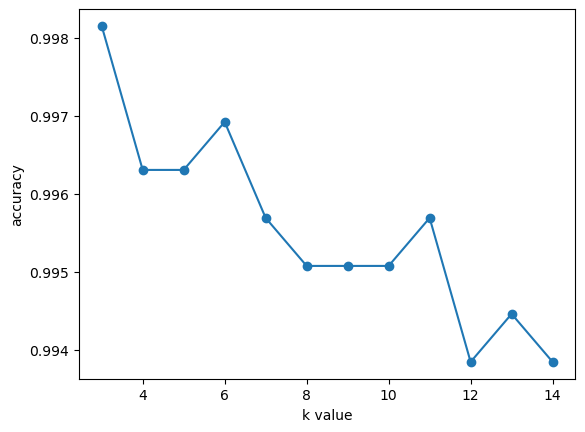

In [14]:
from sklearn.neighbors import KNeighborsClassifier
#create model with varied k values
acc_values = []
#take 3 to 15 random values for k
neighbors = np.arange(3,15)
#loop to create kNN model for each k values
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_predict)
    acc_values.append(acc)
    
#checking for which k value we got highest accuracy
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

We will take optimum k value as 6.

In [15]:
#replace k as 6
classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski')
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

#check the performance of the model
print('Accuracy score ={:.2f}'.format(accuracy_score(y_test,y_predict)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))

Accuracy score =1.00
Confusion Matrix:
 [[838   5]
 [  0 782]]


There is only 5 misclassifications.

### SVM (Radial Based Function)

In [16]:
#import library
from sklearn.svm import SVC
#create an instance of the model
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train, y_train)
y_predict = svm_radial.predict(x_test)

#check the performance of the model
print('Accuracy score ={:.2f}'.format(accuracy_score(y_test,y_predict)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))

Accuracy score =0.99
Confusion Matrix:
 [[842   1]
 [ 11 771]]


There are 12 misclassifications.

### Desicion Tree Classifier

In [17]:
#import library
from sklearn.tree import DecisionTreeClassifier
#create an instance of the model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_predict = dt_model.predict(x_test)

#check the performance of the model
print('Accuracy score ={:.2f}'.format(accuracy_score(y_test,y_predict)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))

Accuracy score =1.00
Confusion Matrix:
 [[843   0]
 [  0 782]]


There are no misclassifications. Decision Tree classifier predicted the mushroom classes with 100% accuracy for the test data.

### Random Forest Classifier

In [18]:
#import libraries 
from sklearn.ensemble import RandomForestClassifier
#create the instance of the model
rf=RandomForestClassifier()
#train the data
rf.fit(x_train,y_train)
#predict x_test
y_predict=rf.predict(x_test)

#check the performance of the model
print('Accuracy score ={:.2f}'.format(accuracy_score(y_test,y_predict)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))

Accuracy score =1.00
Confusion Matrix:
 [[843   0]
 [  0 782]]


Here also there are no misclassifications. 

### Naive Bayes Classifier

In [24]:
#implementing Bernoulli Naive Bayes classifier
from sklearn.naive_bayes import BernoulliNB
bn_classifier = BernoulliNB()
bn_classifier.fit(x_train,y_train)
y_predict = bn_classifier.predict(x_test)

#check the performance of the model
print('Accuracy score ={:.2f}'.format(accuracy_score(y_test,y_predict)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))

Accuracy score =0.84
Confusion Matrix:
 [[797  46]
 [211 571]]


There are 257 misclassifications.

In [25]:
#implementing Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train,y_train)
y_predict = nb_classifier.predict(x_test)

#check the performance of the model
print('Accuracy score ={:.2f}'.format(accuracy_score(y_test,y_predict)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))

Accuracy score =0.81
Confusion Matrix:
 [[792  51]
 [262 520]]


There is 313 misclassifications.

In [26]:
#implementing Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gb_classifier = GaussianNB()
gb_classifier.fit(x_train,y_train)
y_predict = gb_classifier.predict(x_test)

#check the performance of the model
print('Accuracy score ={:.2f}'.format(accuracy_score(y_test,y_predict)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))

Accuracy score =0.92
Confusion Matrix:
 [[771  72]
 [ 55 727]]


There are 127 misclassifications.

In [28]:
#implementing Categorical Naive Bayes classifier
from sklearn.naive_bayes import CategoricalNB
cb_classifier = CategoricalNB()
cb_classifier.fit(x_train,y_train)
y_predict = cb_classifier.predict(x_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_test,y_predict)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))

Accuracy score =0.951
Confusion Matrix:
 [[837   6]
 [ 74 708]]


There are 80 misclassifications.

#### Categorical naive bayes performed well within Naive bayes classifiers.

#### Out of all the supervised learning models which I used, Decision Tree and Random forest classifiers performed well with a 100% accuracy in predicting the class labels for the test data and with 0 misclassifications.